In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df = pd.read_csv('./datasets/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [6]:
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways',
        'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# regression coefficients
print('Coefficients: ', regressor.coef_)

Coefficients:  [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


In [7]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(regressor.score(X_test, y_test)))

Variance score: 0.2036193241012173


In [8]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [9]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [10]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,
                                                                     y_pred)))

Mean Absolute Error: 56.822247478964684
Mean Squared Error: 4666.344787588363
Root Mean Squared Error: 68.3106491521517


Text(0.5, 1.0, 'Residual errors')

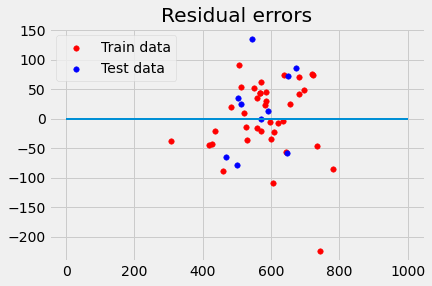

In [11]:
# plot for residual error
## setting plot style
plt.style.use('fivethirtyeight')
## plotting residual errors in training data
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train,
            color="red", s=30, label='Train data')
## plotting residual errors in test data
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test,
            color="blue", s=30, label='Test data')
## plotting line for zero residual error
plt.hlines(y=0, xmin=0, xmax=1000, linewidth=2)
## plotting legend
plt.legend(loc='upper left')
## plot title
plt.title("Residual errors")
